In [ ]:
from style_bench.utils import extract_texts

In [57]:
from textdistance import levenshtein, damerau_levenshtein

s1 = [1,2,3,4,5]
s2 = [1,3,2,4,5,6]

print(levenshtein(s1, s2))
print(damerau_levenshtein(s1, s2))

3
2


In [51]:
# extract texts using the function
answers = extract_texts("data/B2_approved_pairs.json", "answer")
questions = extract_texts("data/B2_approved_pairs.json", "question")

# Select a random sample of 100 answers
import random

sample_size = 200
# random.seed(42)  # For reproducibility
sampled_answers = random.sample(answers, sample_size)

In [47]:
from src.style_bench.style import StyleMetrics
metrics = StyleMetrics()

[nltk_data] Downloading package punkt to /home/ryan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ryan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ryan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [48]:
answer_metrics = metrics.get_distributions(answers)
sample_metrics = metrics.get_distributions(sampled_answers)

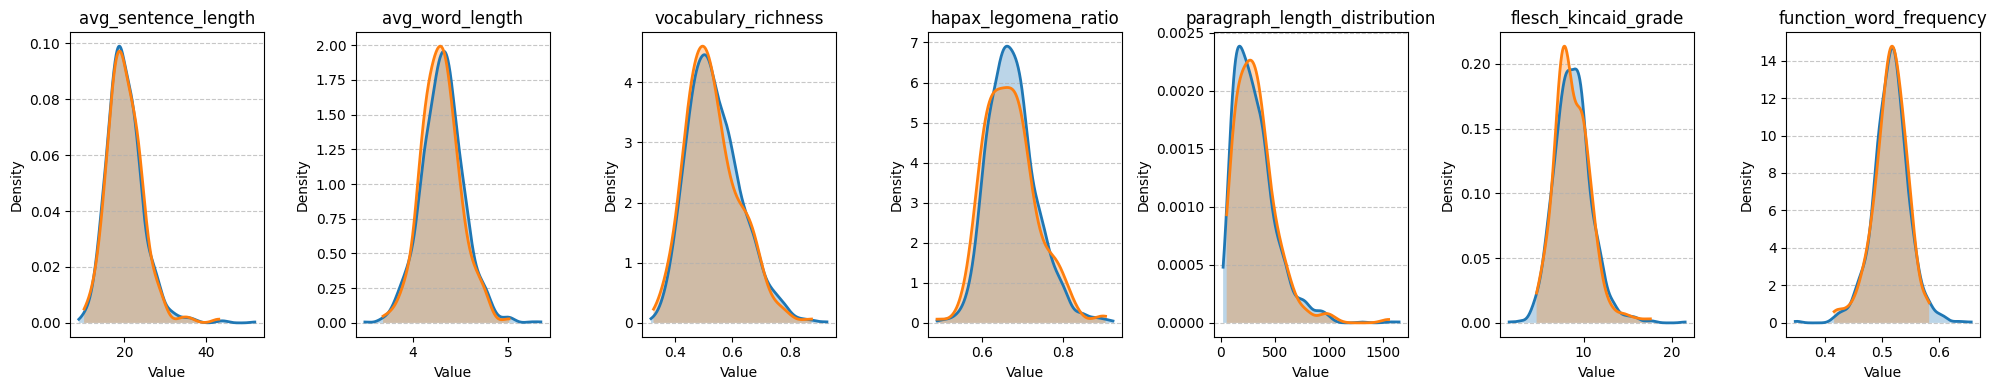

In [49]:
# Display the distributions

import matplotlib.pyplot as plt
import numpy as np

# a single line of subplots
fig, axs = plt.subplots(1, 7, figsize=(20, 4))
for i, name in enumerate(answer_metrics.metric_names):
    answer_data = getattr(answer_metrics, name)

    # Create KDE
    answer_kde = gaussian_kde(answer_data)
    x_range = np.linspace(min(answer_data), max(answer_data), 1000)
    answer_density = answer_kde(x_range)

    axs[i].plot(x_range, answer_density, linewidth=2)
    axs[i].fill_between(x_range, answer_density, alpha=0.3)

    sample_data = getattr(sample_metrics, name)
    sample_kde = gaussian_kde(sample_data)
    x_range = np.linspace(min(sample_data), max(sample_data), 1000)
    sample_density = sample_kde(x_range)

    axs[i].plot(x_range, sample_density, linewidth=2)
    axs[i].fill_between(x_range, sample_density, alpha=0.3)

    axs[i].set_title(name)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Density')
    axs[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [50]:
from scipy.stats import kstest

from scipy.stats import ks_2samp

ks_statistic, p_value = ks_2samp(answer_data, sample_data)


# --- 3. Print and Interpret the Results ---
print("--- Two-Sample KS Test Results ---")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

print("\n--- Interpretation ---")
if p_value > 0.05:
    print(f"✅ The p-value ({p_value:.4f}) is greater than 0.05.")
    print("This suggests there is no significant statistical difference between the full dataset and the sample.")
    print("You can proceed with the assumption that the sample is representative.")
else:
    print(f"⚠️ The p-value ({p_value:.4f}) is less than or equal to 0.05.")
    print("This suggests there is a statistically significant difference.")
    print("The sample may not be a good representation of your full dataset.")

--- Two-Sample KS Test Results ---
KS Statistic: 0.0385
P-value: 0.9513

--- Interpretation ---
✅ The p-value (0.9513) is greater than 0.05.
This suggests there is no significant statistical difference between the full dataset and the sample.
You can proceed with the assumption that the sample is representative.


In [35]:
ks_stat, p_value

(np.float64(0.025274195498221852), np.float64(0.4278641560963403))

In [33]:
from scipy.stats import wasserstein_distance

wasserstein_distance(answer_density, sample_density)

np.float64(2.8031009842677674)

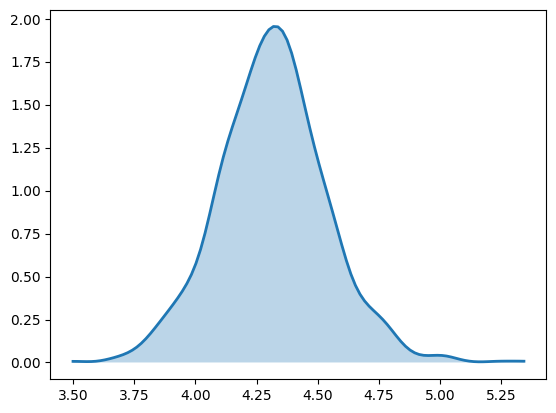

In [18]:
from scipy.stats import gaussian_kde
import numpy as np

# Create KDE
kde = gaussian_kde(answer_metrics.avg_word_length)
x_range = np.linspace(min(answer_metrics.avg_word_length), max(answer_metrics.avg_word_length), 100)
density = kde(x_range)

plt.plot(x_range, density, linewidth=2)
plt.fill_between(x_range, density, alpha=0.3)

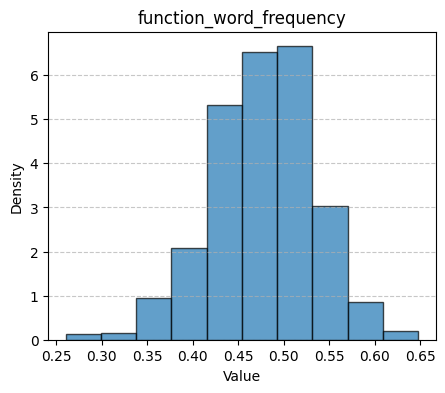

In [28]:
hist, bin_edges = np.histogram(plotting_metrics_questions[idx], density=True)

plt.figure(figsize=(5, 4))
plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges), edgecolor='black', alpha=0.7)
plt.title(metric_names_questions[idx])
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()